In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



Epoch 1/100
1940/1940 [==============================] - 8s 3ms/step - loss: 8.8310 - val_loss: 0.1277
Epoch 2/100
1940/1940 [==============================] - 5s 3ms/step - loss: 0.1158 - val_loss: 0.1086
Epoch 3/100
1940/1940 [==============================] - 5s 3ms/step - loss: 0.1042 - val_loss: 0.0980
Epoch 4/100
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0992 - val_loss: 0.0948
Epoch 5/100
1940/1940 [==============================] - 5s 3ms/step - loss: 0.0957 - val_loss: 0.0972
Epoch 6/100
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0927 - val_loss: 0.0906
Epoch 7/100
1940/1940 [==============================] - 6s 3ms/step - loss: 0.0913 - val_loss: 0.0916
Epoch 8/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0892 - val_loss: 0.0924
Epoch 9/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0884 - val_loss: 0.0979
Epoch 10/100
1940/1940 [==============================] - 5s 2ms/step - l

Epoch 80/100
1940/1940 [==============================] - 4s 2ms/step - loss: 0.0507 - val_loss: 0.0508
Epoch 81/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0505 - val_loss: 0.0494
Epoch 82/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0506 - val_loss: 0.0536
Epoch 83/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0499 - val_loss: 0.0497
Epoch 84/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0496 - val_loss: 0.0511
Epoch 85/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0499 - val_loss: 0.0526
Epoch 86/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0498 - val_loss: 0.0530
Epoch 87/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0491 - val_loss: 0.0508
Epoch 88/100
1940/1940 [==============================] - 5s 2ms/step - loss: 0.0492 - val_loss: 0.0537
Epoch 89/100
1940/1940 [==============================] - 4s 2ms

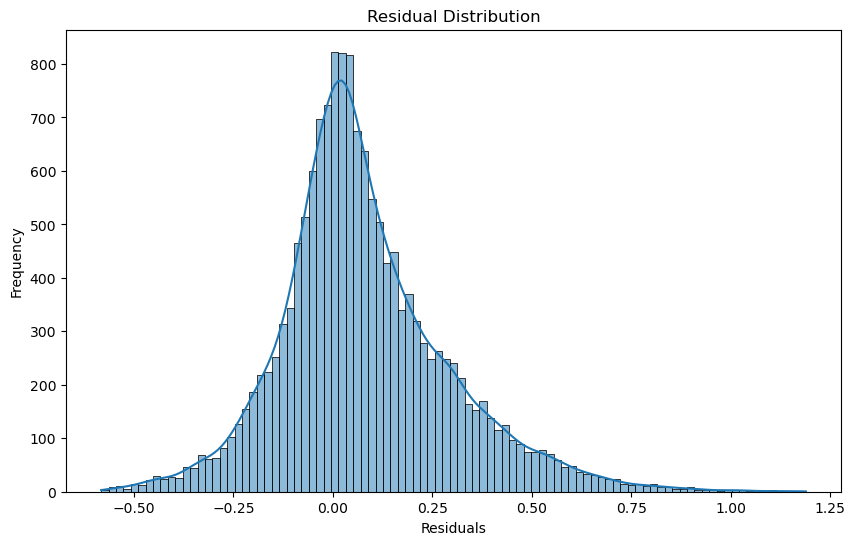

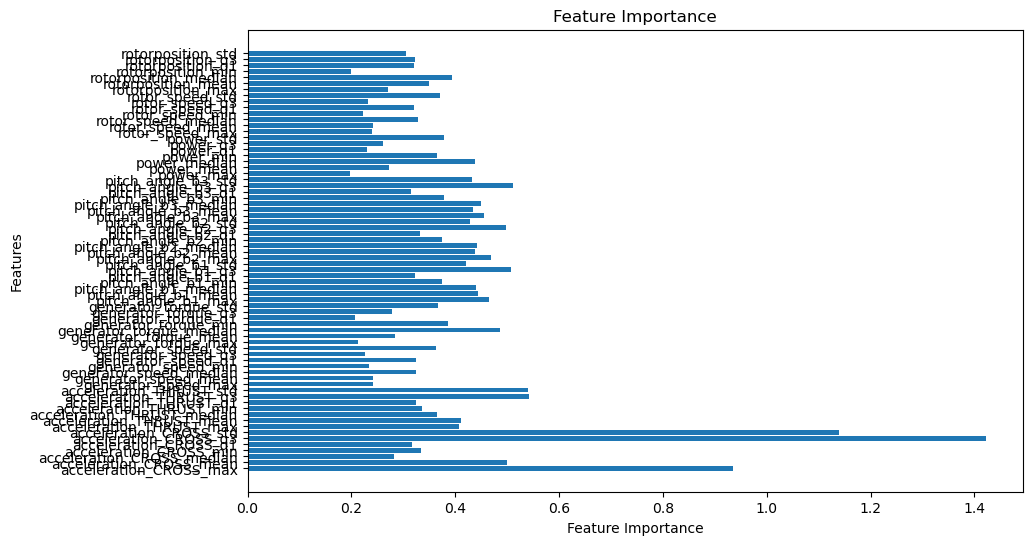

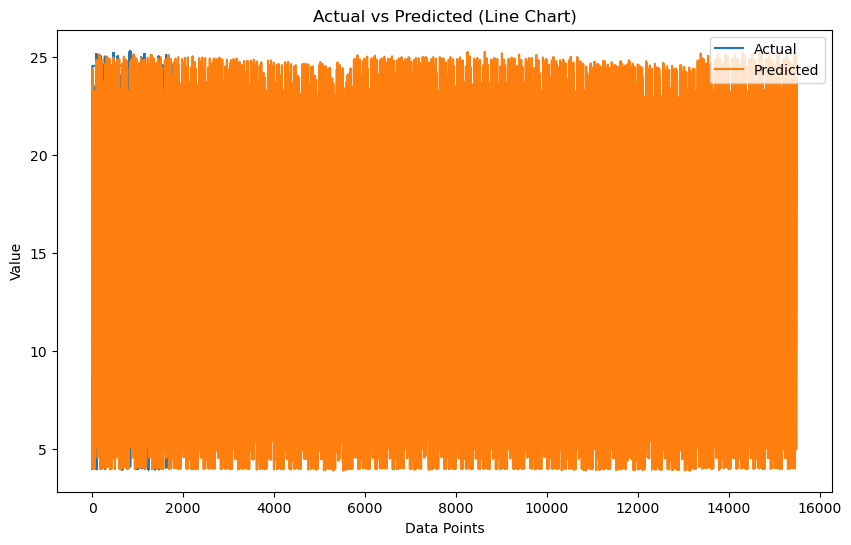

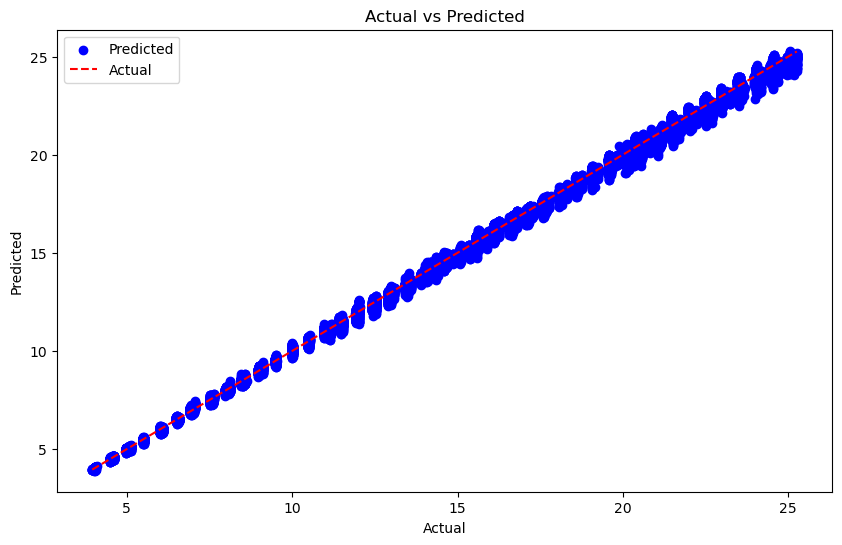

In [5]:


def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y

X_train, y_train = split_data(big_train_df, 'wind_speed_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'wind_speed_mean', columns_to_drop)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

train_predictions = model.predict(X_train_reshaped)
test_predictions = model.predict(X_test_reshaped)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

feature_names = X_train.columns
feature_importances = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(feature_importances), axis=1)
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



Epoch 1/100
1940/1940 [==============================] - 8s 3ms/step - loss: 116.4291 - val_loss: 98.8048
Epoch 2/100
1940/1940 [==============================] - 5s 2ms/step - loss: 94.2271 - val_loss: 93.2184
Epoch 3/100
1940/1940 [==============================] - 5s 2ms/step - loss: 89.7970 - val_loss: 92.5226
Epoch 4/100
1940/1940 [==============================] - 4s 2ms/step - loss: 87.7706 - val_loss: 93.7340
Epoch 5/100
1940/1940 [==============================] - 5s 2ms/step - loss: 86.1418 - val_loss: 90.6010
Epoch 6/100
1940/1940 [==============================] - 5s 2ms/step - loss: 85.0377 - val_loss: 89.4433
Epoch 7/100
1940/1940 [==============================] - 5s 2ms/step - loss: 84.3712 - val_loss: 93.1301
Epoch 8/100
1940/1940 [==============================] - 5s 2ms/step - loss: 83.4148 - val_loss: 87.1181
Epoch 9/100
1940/1940 [==============================] - 5s 2ms/step - loss: 82.8259 - val_loss: 86.3938
Epoch 10/100
1940/1940 [==============================

1940/1940 [==============================] - 5s 2ms/step - loss: 57.6714 - val_loss: 61.8208
Epoch 79/100
1940/1940 [==============================] - 5s 2ms/step - loss: 57.4383 - val_loss: 60.9580
Epoch 80/100
1940/1940 [==============================] - 5s 2ms/step - loss: 57.3795 - val_loss: 66.2784
Epoch 81/100
1940/1940 [==============================] - 5s 2ms/step - loss: 57.0407 - val_loss: 60.8462
Epoch 82/100
1940/1940 [==============================] - 5s 2ms/step - loss: 56.8405 - val_loss: 63.2696
Epoch 83/100
1940/1940 [==============================] - 5s 2ms/step - loss: 56.5526 - val_loss: 59.9872
Epoch 84/100
1940/1940 [==============================] - 5s 2ms/step - loss: 56.2030 - val_loss: 60.6511
Epoch 85/100
1940/1940 [==============================] - 4s 2ms/step - loss: 56.1618 - val_loss: 59.1904
Epoch 86/100
1940/1940 [==============================] - 4s 2ms/step - loss: 55.9551 - val_loss: 59.9684
Epoch 87/100
1940/1940 [==============================] - 5

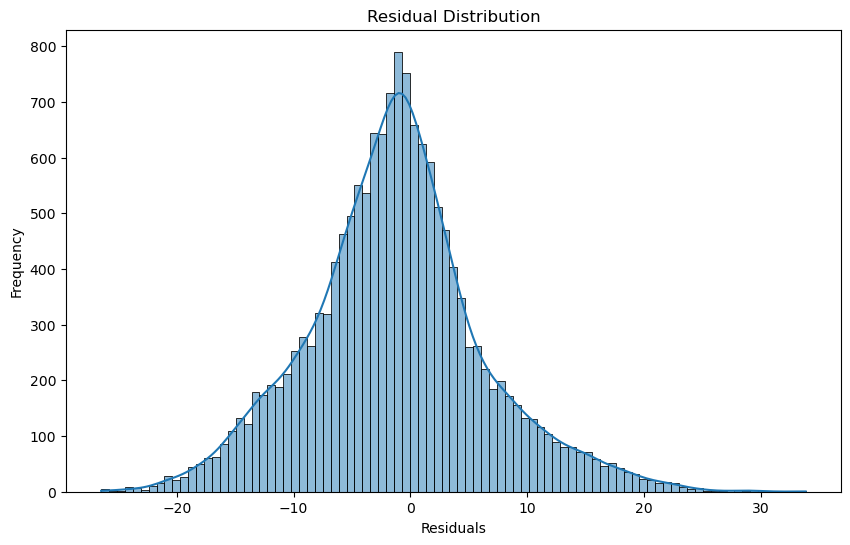

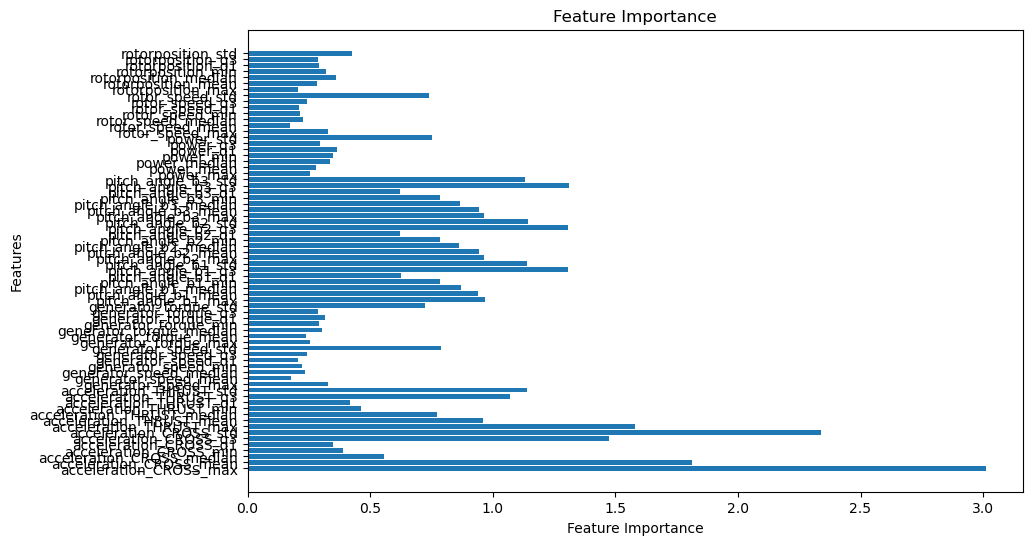

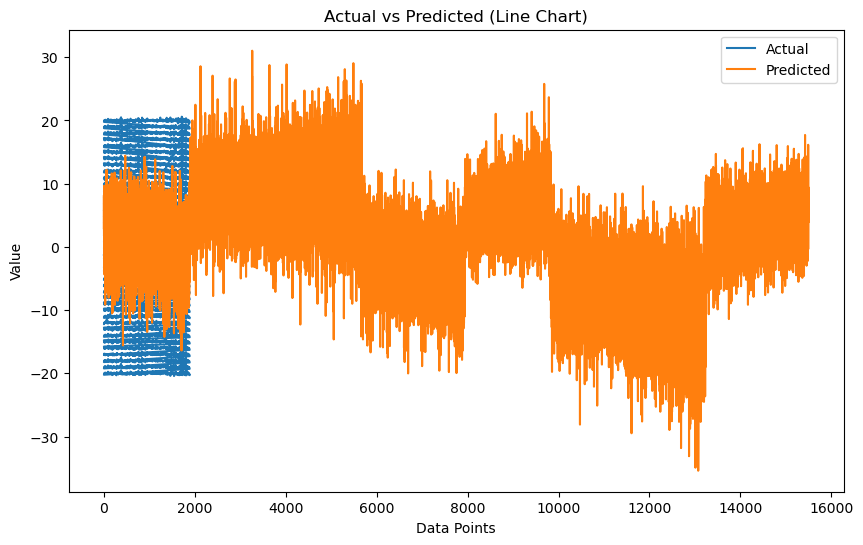

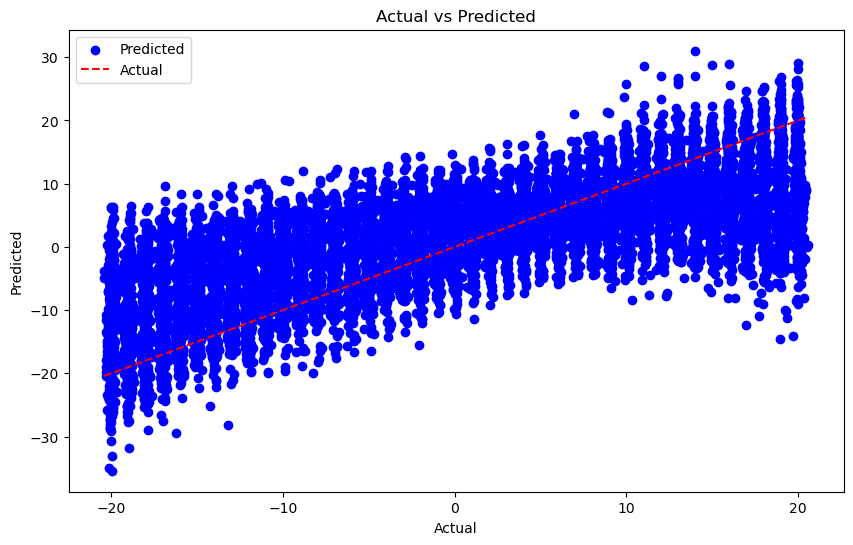

In [6]:


def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y

X_train, y_train = split_data(big_train_df, 'yaw_error_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'yaw_error_mean', columns_to_drop)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

train_predictions = model.predict(X_train_reshaped)
test_predictions = model.predict(X_test_reshaped)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

feature_names = X_train.columns
feature_importances = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(feature_importances), axis=1)
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



Epoch 1/100
1940/1940 [==============================] - 7s 3ms/step - loss: 8.4035e-05 - val_loss: 2.5667e-05
Epoch 2/100
1940/1940 [==============================] - 5s 2ms/step - loss: 2.4452e-05 - val_loss: 1.6159e-05
Epoch 3/100
1940/1940 [==============================] - 5s 2ms/step - loss: 1.9962e-05 - val_loss: 1.3809e-05
Epoch 4/100
1940/1940 [==============================] - 5s 3ms/step - loss: 1.7574e-05 - val_loss: 1.2800e-05
Epoch 5/100
1940/1940 [==============================] - 5s 2ms/step - loss: 1.6433e-05 - val_loss: 1.2691e-05
Epoch 6/100
1940/1940 [==============================] - 5s 2ms/step - loss: 1.4944e-05 - val_loss: 1.1625e-05
Epoch 7/100
1940/1940 [==============================] - 5s 2ms/step - loss: 1.4969e-05 - val_loss: 1.1143e-05
Epoch 8/100
1940/1940 [==============================] - 5s 2ms/step - loss: 1.3478e-05 - val_loss: 1.2158e-05
Epoch 9/100
1940/1940 [==============================] - 5s 2ms/step - loss: 1.2856e-05 - val_loss: 9.7887e-06
E

1940/1940 [==============================] - 5s 2ms/step - loss: 6.8069e-06 - val_loss: 7.3531e-06
Epoch 75/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.8146e-06 - val_loss: 6.6066e-06
Epoch 76/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.7460e-06 - val_loss: 6.2335e-06
Epoch 77/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.7897e-06 - val_loss: 8.7920e-06
Epoch 78/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.6386e-06 - val_loss: 8.7728e-06
Epoch 79/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.7390e-06 - val_loss: 6.4819e-06
Epoch 80/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.5992e-06 - val_loss: 7.5868e-06
Epoch 81/100
1940/1940 [==============================] - 5s 2ms/step - loss: 6.5363e-06 - val_loss: 6.4206e-06
Epoch 82/100
1940/1940 [==============================] - 4s 2ms/step - loss: 6.6556e-06 - val_loss: 6.5521e-06
Epoch

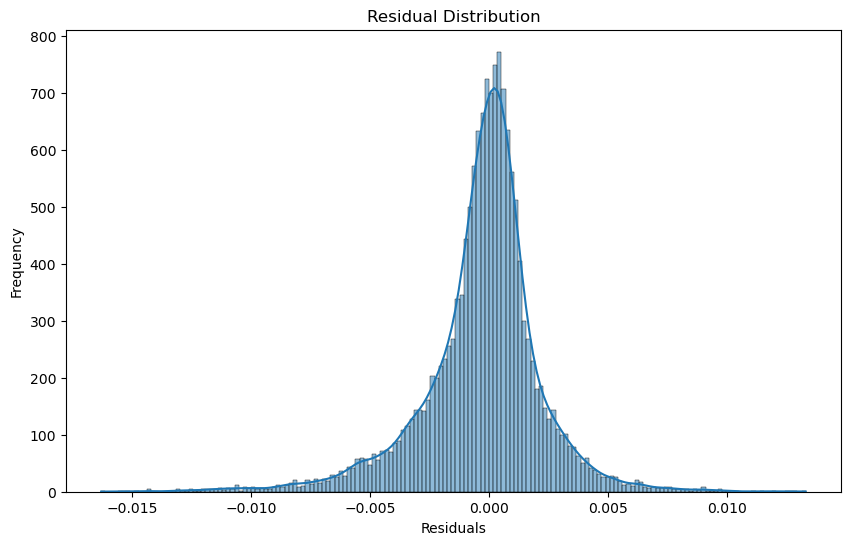

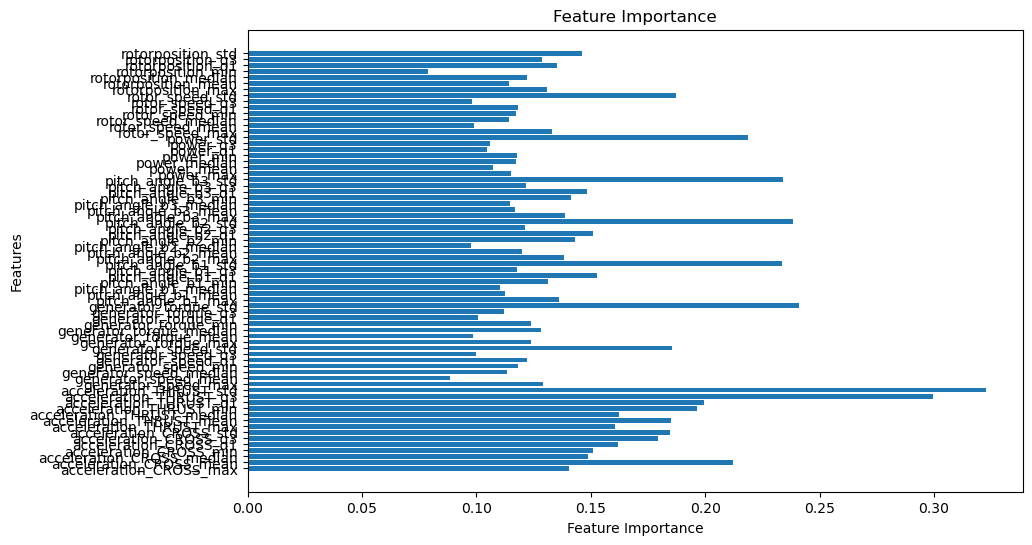

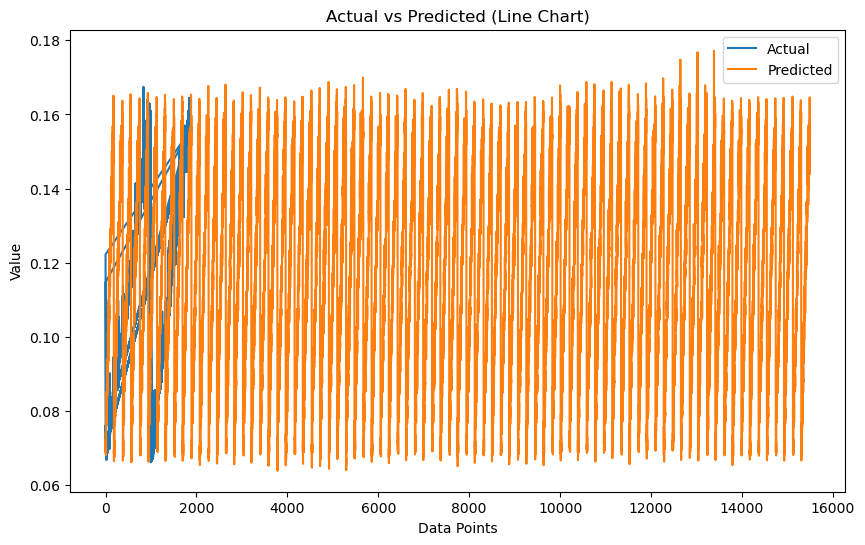

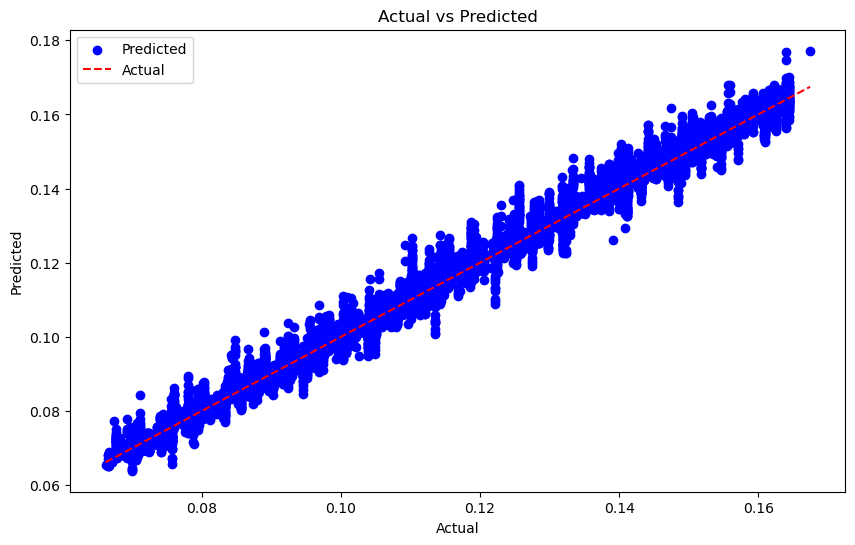

In [7]:


def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y

X_train, y_train = split_data(big_train_df, 'Turbulence', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'Turbulence', columns_to_drop)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

train_predictions = model.predict(X_train_reshaped)
test_predictions = model.predict(X_test_reshaped)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

feature_names = X_train.columns
feature_importances = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(feature_importances), axis=1)
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

